# ML-PROJECT 2 VEHICLE PRICE DETECTION

# Step 1: Load data

#### our algo will take vahicle details like mileage,engine type ,no of doors,length,width,height ,..... and will predict the Price of the vehicle

In [1]:
import pandas as pd
auto_data=pd.read_csv('Automobile_data.csv')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Step 2: Clean data

In [2]:
import numpy as np
auto_data=auto_data.replace('?',np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
auto_data['price'].describe() #gives the datatype of the col even though it looks like int it is not

count       201
unique      186
top       16500
freq          2
Name: price, dtype: object

In [4]:
auto_data['price']=pd.to_numeric(auto_data['price'],errors='coerce') #coerce means force means forcefully convert if there any errors
auto_data['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [5]:
# let us reomove unwanted columns -which are not useful
auto_data=auto_data.drop('normalized-losses',axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


In [6]:
auto_data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [7]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
print(auto_data['horsepower'].describe())

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64


In [8]:
# check all col datatype manually

In [9]:
auto_data['bore'] = pd.to_numeric(auto_data['bore'], errors='coerce')
print(auto_data['bore'].describe())

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64


In [10]:
auto_data['stroke'] = pd.to_numeric(auto_data['stroke'], errors='coerce')
print(auto_data['stroke'].describe())

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64


In [11]:
auto_data['peak-rpm'] = pd.to_numeric(auto_data['peak-rpm'], errors='coerce')
print(auto_data['peak-rpm'].describe())

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64


In [12]:
auto_data['num-of-cylinders']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

In [13]:
cylinder_dict={
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'eight':8,
    'twelve':12
}
auto_data['num-of-cylinders'].replace(cylinder_dict,inplace=True)
auto_data['num-of-cylinders'].head()

C:\Users\krsan\AppData\Local\Temp\ipykernel_27672\3299122718.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto_data['num-of-cylinders'].replace(cylinder_dict,inplace=True)


0    4
1    4
2    6
3    4
4    5
Name: num-of-cylinders, dtype: int64

In [14]:
auto_data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [15]:
auto_data['fuel-system'].describe()

count      205
unique       8
top       mpfi
freq        94
Name: fuel-system, dtype: object

In [16]:
make_dict = {
    'alfa-romero':1, 'audi':2, 'bmw':3, 'chevrolet':4, 'dodge':5,
    'honda':6, 'isuzu':7, 'jaguar':8, 'mazda':9, 'mercedes-benz':10,
    'mercury':11, 'mitsubishi':12, 'nissan':13, 'peugot':14,
    'plymouth':15, 'porsche':16, 'renault':17, 'saab':18,
    'subaru':19, 'toyota':20, 'volkswagen':21, 'volvo':22
}
aspiration = {'std': 1, 'turbo': 1}
num_of_doors = {'four': 4, 'two': 2}
body_style = {'convertible': 1, 'hardtop': 2, 'hatchback': 3, 'sedan': 4, 'wagon': 5}
drive_wheels = {'4wd': 1, 'fwd': 2, 'rwd': 3}
engine_location = {'front': 1, 'rear': 2}
engine_type = {'dohc': 1, 'dohcv': 2, 'l': 3, 'ohc': 4, 'ohcf': 5, 'ohcv': 6, 'rotor': 7}
fuel_system = {'1bbl': 1, '2bbl': 2, '4bbl': 4, 'idi': 5, 'mfi': 6, 'mpfi': 7, 'spdi': 8, 'spfi': 9}
fuel_type = {'gas': 1, 'diesel': 2}

In [17]:
auto_data['make'].replace(make_dict, inplace=True)
auto_data['aspiration'].replace(aspiration, inplace=True)
auto_data['num-of-doors'].replace(num_of_doors, inplace=True)
auto_data['body-style'].replace(body_style, inplace=True)
auto_data['drive-wheels'].replace(drive_wheels, inplace=True)
auto_data['engine-location'].replace(engine_location, inplace=True)
auto_data['engine-type'].replace(engine_type, inplace=True)
auto_data['fuel-system'].replace(fuel_system, inplace=True)
auto_data['fuel-type'].replace(fuel_type, inplace=True)

C:\Users\krsan\AppData\Local\Temp\ipykernel_27672\2621163891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto_data['make'].replace(make_dict, inplace=True)
C:\Users\krsan\AppData\Local\Temp\ipykernel_27672\2621163891.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto_data['make'].repla

In [18]:
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,1,1,1,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,1,1,1,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,1,1,1,2.0,3,3,1,94.5,171.2,...,152,7,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,2,1,1,4.0,4,2,1,99.8,176.6,...,109,7,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,2,1,1,4.0,4,1,1,99.4,176.6,...,136,7,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [19]:
#lets clean up our data  wherever Nan is there
auto_data.isnull()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
auto_data.isna().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [21]:
del auto_data['horsepower']
del auto_data['curb-weight']
del auto_data['peak-rpm']
# del auto_data['length']

In [22]:
auto_data=auto_data.dropna()

# STEP 3: Train ,Test ,Split

In [23]:
from sklearn.model_selection import train_test_split
x=auto_data.drop('price',axis=1)
y=auto_data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=0)

# STEP 4:Train the model with algo

### 1) Linear regression algo

In [24]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
#accuracy calculation
linear_model.score(x_train,y_train)

0.8882644777763647

In [26]:
linear_model.coef_ # to check which col is imp is coef is + then that col has + impact and -ve means -ve impact if it is 0 and close to 0 then that col is not so imp and which remove

array([-5.97669515e+02, -1.81205504e+02,  2.08919904e+03,  5.28643795e-12,
       -2.67295810e+02, -2.01085022e+02,  5.46446002e+02,  1.33342369e+04,
       -6.37222697e+01, -4.46789795e+00,  1.00032524e+03,  3.00598597e+02,
       -7.51317535e+02,  5.19501878e+02,  1.23937616e+02,  3.05948358e+02,
       -1.98410685e+03, -3.79514800e+03, -6.20407719e+01, -1.68387338e+02,
        1.55426325e+02])

# STEP 5: test the algo

In [27]:
#lets predict using linear regression model
y_predict=linear_model.predict(x_test)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


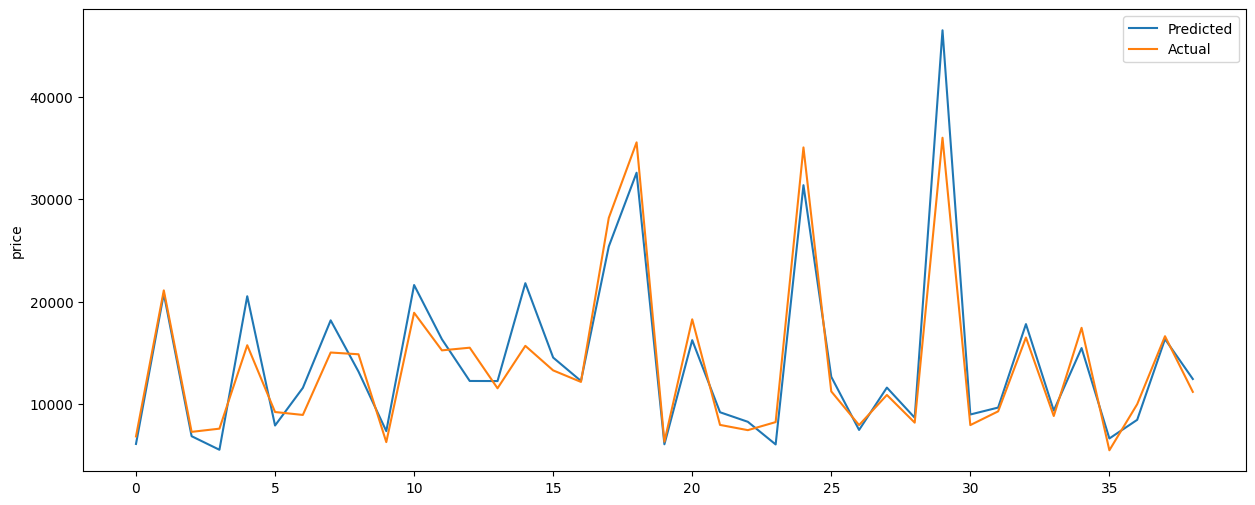

In [28]:
# lets plot the prediction using matplotlib 
%pylab inline
pylab.rcParams['figure.figsize']=(15,6)

plt.plot(y_predict,label="Predicted")
plt.plot(y_test.values,label="Actual")
plt.ylabel('price')
plt.legend()
plt.show()

In [29]:
#checking acccuracy
score=linear_model.score(x_test,y_test)
score

0.8858608795140936

# STEP 6:Find the error

### Mean sqr error -this will tell us how much error is there in the given output

In [30]:
from sklearn.metrics import mean_squared_error
linear_model_mse=mean_squared_error(y_predict ,y_test) # predicted y and act y
linear_model_mse #its coming out to be 26 million

7069378.219052896

In [31]:
import math 
math.sqrt(linear_model_mse)  #this gives the actual error

2658.830235094542

## Conclusion: accuracy is 88% and error is 2658 dollars

# LASSO ALGORITHM

In [32]:
# from sklearn.linear_model import Lasso
# lasso_model=Lasso(alpha=0.5 ,normalize=True) #alpha is regularization parameter 0to 0.5
# lasso_model.fit(x_train,y_train)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales data then fits Lasso
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.5))
lasso_model.fit(x_train, y_train)

,steps,"[('standardscaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True


In [33]:
# coef=pd.Series(lasso_model.coef_,predictors).sort_values()
# print(coef)

predictors = x_train.columns
import pandas as pd

# Get the Lasso model from the pipeline
lasso = lasso_model.named_steps['lasso']

# Create and sort the Series of coefficients
coef = pd.Series(lasso.coef_, index=predictors).sort_values()
print(coef)


stroke              -1183.016263
make                -1130.336553
city-mpg            -1068.899755
symboling            -743.070537
engine-type          -708.375795
bore                 -533.859179
wheel-base           -403.254609
num-of-doors         -260.063186
compression-ratio    -187.675367
body-style           -176.899040
length                -51.785801
aspiration              0.000000
drive-wheels          296.367444
num-of-cylinders      444.556197
fuel-type             590.758009
height                742.500524
fuel-system           760.890949
highway-mpg          1040.589137
engine-location      1831.208077
width                2123.963150
engine-size          4875.894125
dtype: float64


In [35]:
y_predict=lasso_model.predict(x_test)
score=lasso_model.score(x_test,y_test)
print('accuracy of lasso model is...',score)
lasso_model_mse=mean_squared_error(y_predict,y_test)
print('error of lasso model is....',math.sqrt(lasso_model_mse))

accuracy of lasso model is... 0.8858457727393342
error of lasso model is.... 2659.0061827466593


## Conclusion for lasso:-accuracy is 88% and error is 2659 dollars

In [38]:
from sklearn.linear_model import Ridge

ridge_model=Ridge(alpha=0.5)
ridge_model.fit(x_train,y_train)
y_predict=ridge_model.predict(x_test)
score=ridge_model.score(x_test,y_test)
print('accuracy of ridge model is...',score)
lasso_model_mse=mean_squared_error(y_predict,y_test)
print('error of ridge model is....',math.sqrt(lasso_model_mse))

accuracy of ridge model is... 0.8767894080744185
error of ridge model is.... 2762.468724930253


## Conclusion for lasso:-accuracy is 87% and error is 2762 dollars